## Load Packages

In [125]:
# For Analysis
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
!pip install geopandas
import geopandas as gpd
from scipy.stats import norm
#import pysal as ps

# For Calculations
import math
import scipy.stats as stats
from math import floor

#For Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

#For Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# For Validation
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix

# For Storing Models
import pickle
%matplotlib inline

## Load data

In [126]:
## Read csv file 
#Upload dataset
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Thesis/")
!ls


with open('new_listings.csv') as f:
    new_listings = pd.read_csv(f)
f.close()
new_listings.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Archive			      review_with_polarity.pickle
 AspectBasedSentimentAnalysis.ipynb   rfe_grid.csv
 cleaned_reviews_data_lang.csv	      Ridge_grid2.csv
 cleaned_reviews_data.pickle	      Ridge_grid.csv
 cleaned_reviews_en.csv		      Sample_2.ipynb
 cleaned_reviews_en_lemma.csv	      Sample.ipynb
 clustered_data.pickle		      score_pd
'clustered location.ipynb'	      SentimentAnalysis_2.ipynb
 complete_data_merged.csv	     'SENTIMENT ANALYSIS FINAL.ipynb'
'Cópia de cleaned_reviews_en.csv'     single_character_pd
'Cópia de Sample.ipynb'		      spell_pd
'JOIN SENTIMENT.ipynb'		      SVR_grid2.csv
 Linear_grid2.csv		      SVR_grid.csv
 Linear_grid.csv		     'Text Pre-Processing.ipynb'
 listings.csv			      Untitled0.ipynb
 listings.csv.gz		      words_df.pickle
 model.png			      words_pd
 negative-words.txt		      x_data.pickle
 new_listings.csv		      XGB_grid2.

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment_score,polarity
0,2818,https://www.airbnb.com/rooms/2818,20210208155251,2021-02-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",$59.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,29,46,60,139,2021-02-11,278,1,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.92,0.748479,Positive
1,20168,https://www.airbnb.com/rooms/20168,20210208155251,2021-02-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36509,4.89354,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",$129.00,1,365,1.0,4.0,60.0,1125.0,3.8,413.8,NaN,t,0,0,0,0,2021-02-11,339,19,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.54,0.547088,Positive
2,25428,https://www.airbnb.com/rooms/25428,20210208155251,2021-02-10,"Lovely, spacious 1 bed apt in Center(with lift)",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",NaN,NaN,0%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Hangers"", ""Elevator"

In [127]:
new_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

### Data Preparation

https://www.kaggle.com/duygut/airbnb-nyc-price-prediction

In [128]:
columns_to_keep = ['id', 'host_since', 'host_is_superhost', 'host_identity_verified',
                   'neighbourhood', 'neighbourhood_cleansed', 
                   'neighbourhood_group_cleansed', 'latitude', 'longitude',
                   'property_type', 'room_type', 'accommodates', 'bathrooms', 
                   'bedrooms', 'beds', 'price', 'minimum_nights','number_of_reviews',
                   'first_review', 'last_review', 'reviews_per_month','sentiment_score','polarity']

df = new_listings[columns_to_keep]#.set_index('id')
print("{} rows and {} columns - after dropping irrelevant columns.".format(*df.shape))

15579 rows and 23 columns - after dropping irrelevant columns.


In [129]:
print("\n----------- Minimum -----------\n")
print(df.min())
 
print("\n----------- Maximum -----------\n")
print(df.max())

print("\n----------- DataType -----------\n")
print(df.dtypes)


----------- Minimum -----------

id                                         2818
neighbourhood_cleansed          Bijlmer-Centrum
neighbourhood_group_cleansed                NaN
latitude                                52.2893
longitude                               4.75594
property_type                              Barn
room_type                       Entire home/apt
accommodates                                  1
bathrooms                                   NaN
bedrooms                                      1
beds                                          0
price                                 $1,000.00
minimum_nights                                1
number_of_reviews                             1
first_review                         2009-03-30
last_review                          2011-06-26
reviews_per_month                          0.01
sentiment_score                          -2.625
polarity                               Negative
dtype: object

----------- Maximum -----------

id    

In [130]:
#remove $ sign from price column
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [131]:
df['price'].describe()

count    15579.000000
mean       151.463509
std        161.982196
min          4.000000
25%         95.000000
50%        127.000000
75%        179.000000
max       8000.000000
Name: price, dtype: float64

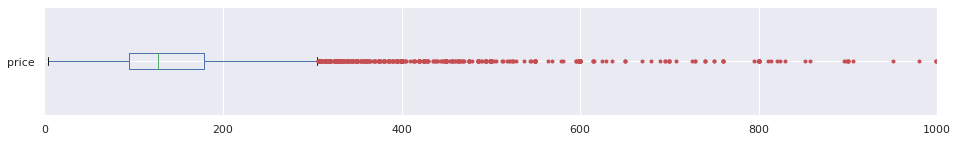

In [132]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

Text(0.5, 1.0, 'Room Type vs Price')

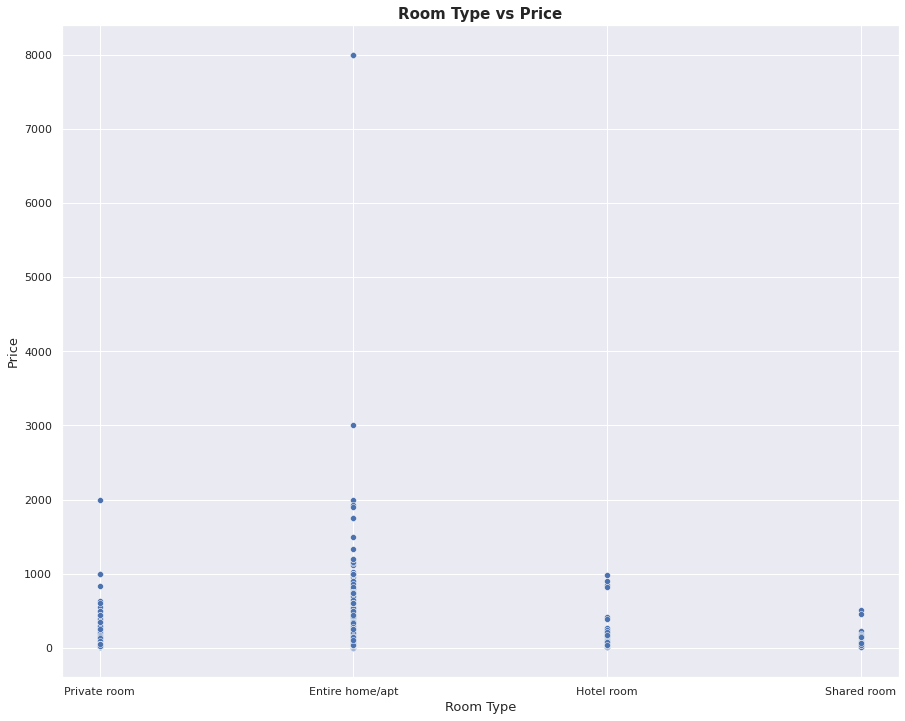

In [133]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood')

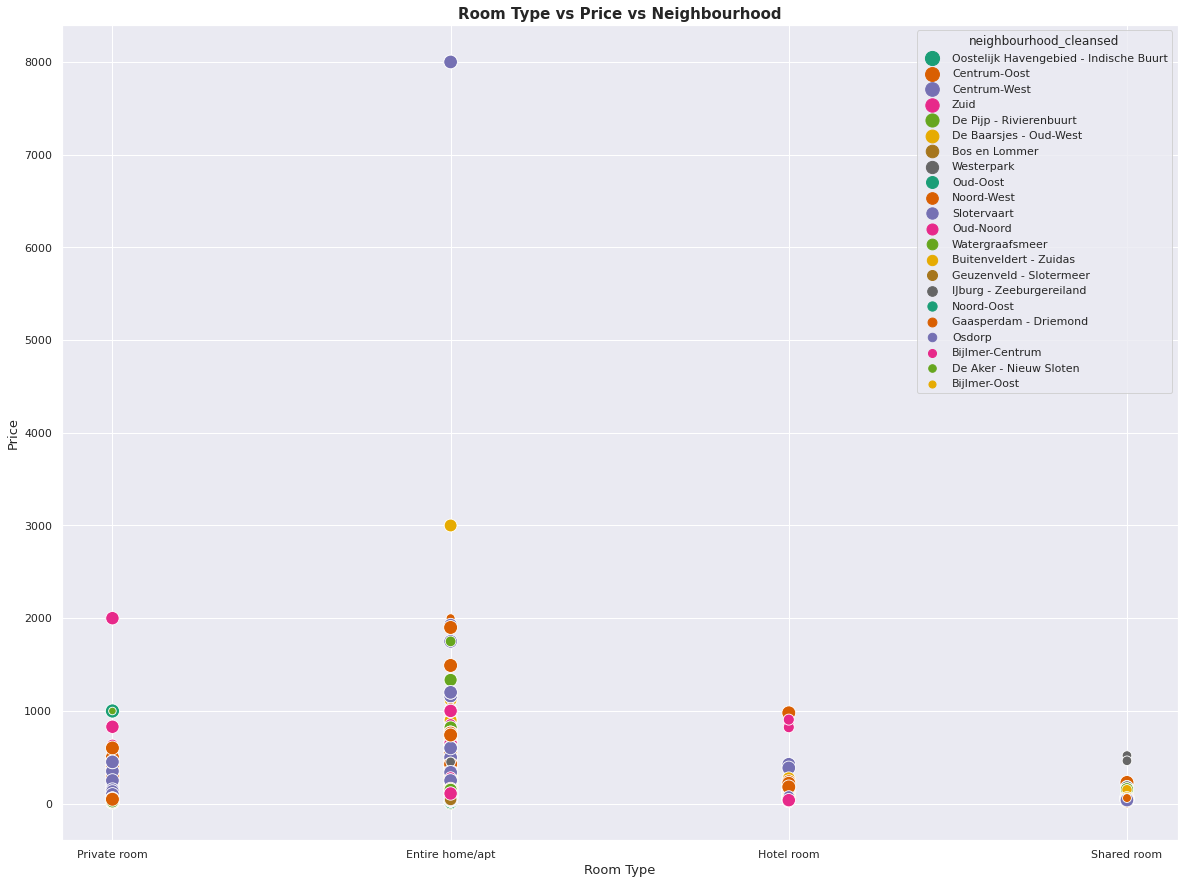

In [134]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_cleansed", size="neighbourhood_cleansed",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood",size=15, weight='bold')

In [135]:
df['neighbourhood_cleansed'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'Centrum-West', 'Zuid', 'De Pijp - Rivierenbuurt',
       'De Baarsjes - Oud-West', 'Bos en Lommer', 'Westerpark',
       'Oud-Oost', 'Noord-West', 'Slotervaart', 'Oud-Noord',
       'Watergraafsmeer', 'Buitenveldert - Zuidas',
       'Geuzenveld - Slotermeer', 'IJburg - Zeeburgereiland',
       'Noord-Oost', 'Gaasperdam - Driemond', 'Osdorp', 'Bijlmer-Centrum',
       'De Aker - Nieuw Sloten', 'Bijlmer-Oost'], dtype=object)

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood')

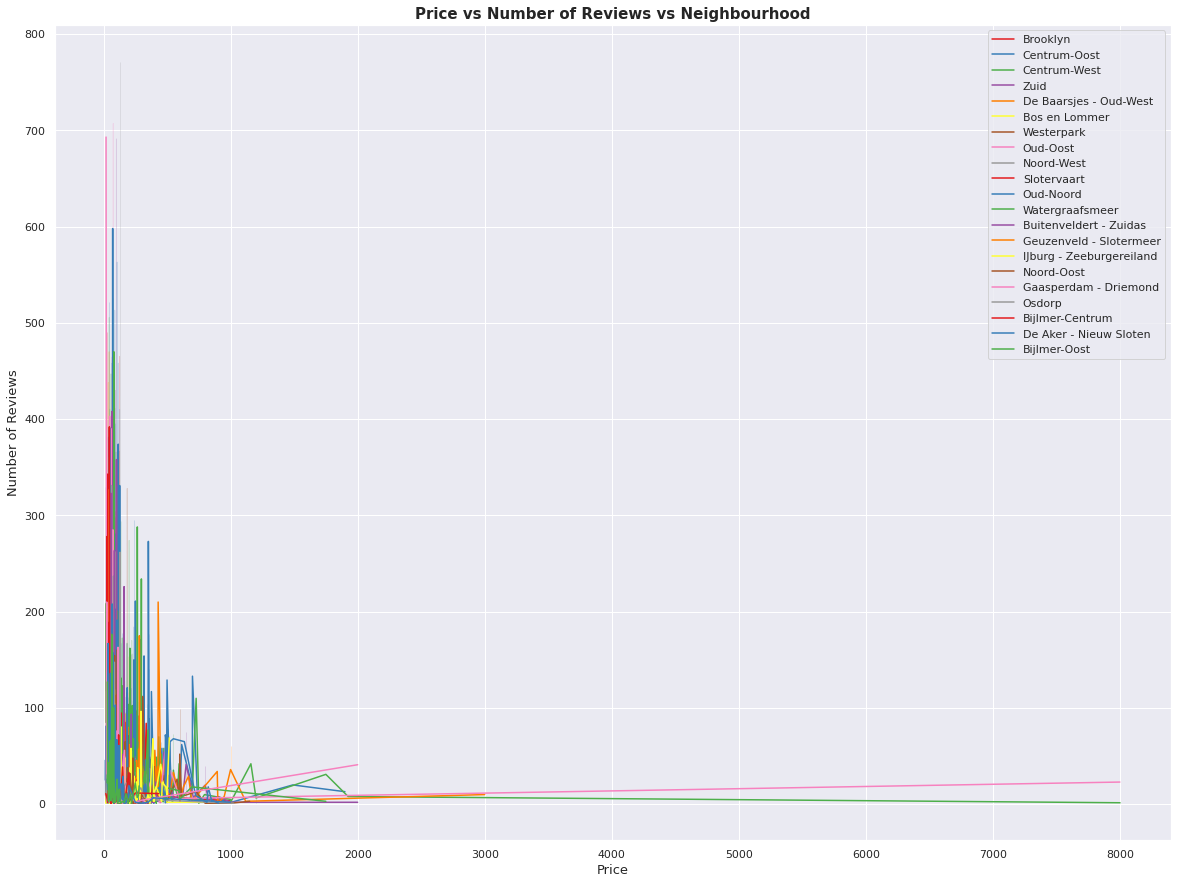

In [136]:
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Oostelijk Havengebied - Indische Buurt'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Centrum-Oost'],
             label='Centrum-Oost')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Centrum-West'],
             label='Centrum-West')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Zuid'],
             label='Zuid')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='De Baarsjes - Oud-West'],
             label='De Baarsjes - Oud-West')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Bos en Lommer'],
             label='Bos en Lommer')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Westerpark'],
             label='Westerpark')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Oud-Oost'],
             label='Oud-Oost')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Noord-West'],
             label='Noord-West')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Slotervaart'],
             label='Slotervaart')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Oud-Noord'],
             label='Oud-Noord')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Watergraafsmeer'],
             label='Watergraafsmeer')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Buitenveldert - Zuidas'],
             label='Buitenveldert - Zuidas')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Geuzenveld - Slotermeer'],
             label='Geuzenveld - Slotermeer')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='IJburg - Zeeburgereiland'],
             label='IJburg - Zeeburgereiland')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Noord-Oost'],
             label='Noord-Oost')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Gaasperdam - Driemond'],
             label='Gaasperdam - Driemond')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Osdorp'],
             label='Osdorp')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Bijlmer-Centrum'],
             label='Bijlmer-Centrum')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='De Aker - Nieuw Sloten'],
             label='De Aker - Nieuw Sloten')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_cleansed']=='Bijlmer-Oost'],
             label='Bijlmer-Oost')
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood",size=15, weight='bold')

Text(0.5, 1.0, 'Sentiment Polarity vs Price')

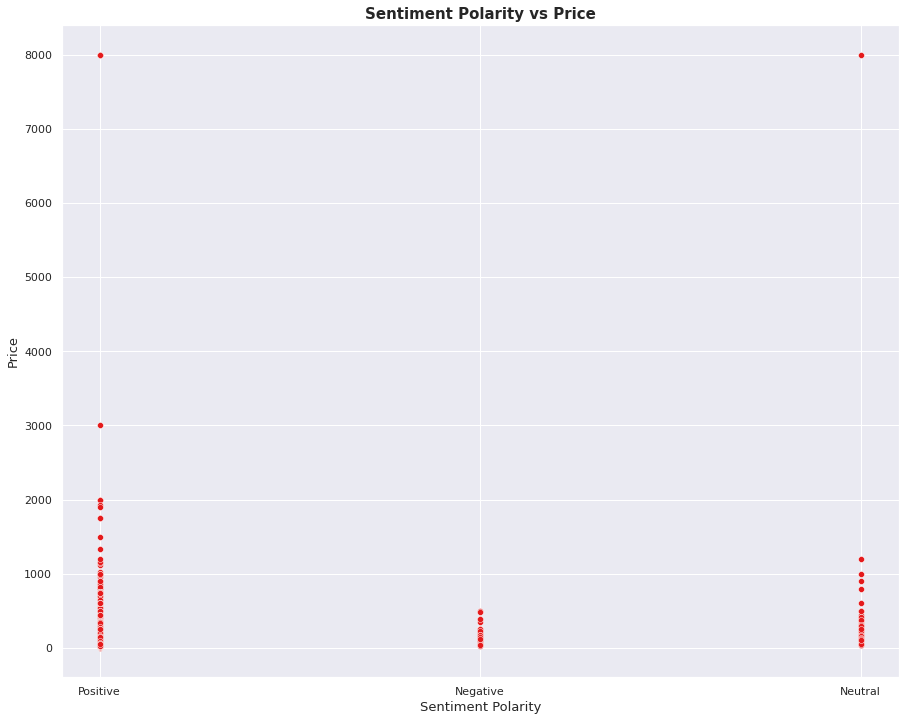

In [137]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='polarity', y='price', data=df)

plt.xlabel("Sentiment Polarity", size=13)
plt.ylabel("Price", size=13)
plt.title("Sentiment Polarity vs Price",size=15, weight='bold')

In [138]:
df.drop(df[ (df.price < 20) | (df.price == 0) ].index, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [139]:
df['price'].describe()

count    15562.000000
mean       151.611618
std        162.008558
min         20.000000
25%         95.000000
50%        127.000000
75%        179.000000
max       8000.000000
Name: price, dtype: float64

In [140]:
print("{} rows and {} columns - after being price-wise preprocessed.".format(*df.shape))

15562 rows and 23 columns - after being price-wise preprocessed.


### Missing values

In [141]:
df.isna().sum()

id                                  0
host_since                         57
host_is_superhost                  57
host_identity_verified             57
neighbourhood                    4939
neighbourhood_cleansed              0
neighbourhood_group_cleansed    15562
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                       15562
bedrooms                          820
beds                               36
price                               0
minimum_nights                      0
number_of_reviews                   0
first_review                        0
last_review                         0
reviews_per_month                   0
sentiment_score                     0
polarity                            0
dtype: int64

In [142]:
def handle_missing(df):
    temp = df.copy()
    
    # Fill the Host Since column with the date of first review if available
    temp.host_since = df.host_since.fillna(df.first_review)
    
    # Fill missing values for some columns with 0
    temp.bedrooms.fillna(0, inplace = True)
    temp.beds.fillna(0, inplace = True)
    
    #Fill missing values for some columns with f
    temp.host_is_superhost.fillna(value='f', inplace=True)
    temp.host_identity_verified.fillna(value='f', inplace=True)
    
    #Drop the rows with missing values for particular  columns
    temp.dropna(subset = ['host_since', 'host_is_superhost',
                             'host_identity_verified', 'last_review', 'reviews_per_month'], inplace = True)
    
    # Drop the columns that have a lot of missing values and are not useful for analysis
    temp.drop(['neighbourhood_group_cleansed','neighbourhood','bathrooms'], axis = 1, inplace = True)
    
    return temp

In [143]:
df = handle_missing(df)

In [144]:
df.isna().sum()

id                        0
host_since                0
host_is_superhost         0
host_identity_verified    0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
number_of_reviews         0
first_review              0
last_review               0
reviews_per_month         0
sentiment_score           0
polarity                  0
dtype: int64

In [145]:
print("{} rows and {} columns - after having dealt with missing values.".format(*df.shape))

15562 rows and 20 columns - after having dealt with missing values.


## Cluster Locations

https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1

In [146]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [147]:
X=df.loc[:,['id','latitude','longitude']]
X.head(10)

,id,latitude,longitude
0,2818,52.36575,4.94142
1,20168,52.36509,4.89354
2,25428,52.37297,4.88339
3,27886,52.38761,4.89188
4,28871,52.36610,4.88953
5,29051,52.36607,4.89100
6,31080,52.35132,4.84838
7,41125,52.37891,4.88321
8,43109,52.37537,4.88932
9,44129,52.38071,4.88610


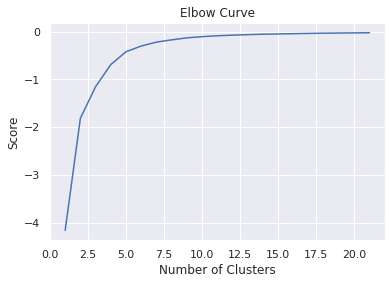

In [148]:
K_clusters = range(1,22)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [149]:
kmeans = KMeans(n_clusters = 22, init ='k-means++')

# Compute k-means clustering
kmeans.fit(X[X.columns[1:3]]) 
X['cluster_location'] = kmeans.fit_predict(X[X.columns[1:3]])

# Coordinates of cluster centers
centers = kmeans.cluster_centers_ 

# Labels of each point
labels = kmeans.predict(X[X.columns[1:3]]) 
X.head(10)

,id,latitude,longitude,cluster_location
0,2818,52.36575,4.94142,7
1,20168,52.36509,4.89354,5
2,25428,52.37297,4.88339,2
3,27886,52.38761,4.89188,8
4,28871,52.36610,4.88953,5
5,29051,52.36607,4.89100,5
6,31080,52.35132,4.84838,18
7,41125,52.37891,4.88321,8
8,43109,52.37537,4.88932,8
9,44129,52.38071,4.88610,8


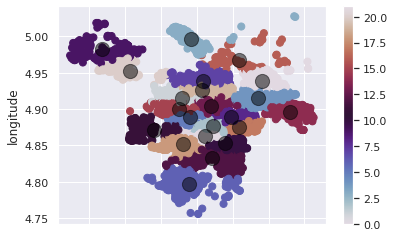

In [150]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='twilight')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [151]:
centers = kmeans.cluster_centers_
print(centers)

[[52.36454605  4.86249813]
 [52.35188014  4.91497159]
 [52.3692601   4.87625265]
 [52.35648282  4.99584292]
 [52.39406913  4.91467981]
 [52.35590052  4.88944916]
 [52.35574101  4.79643961]
 [52.36326102  4.93935128]
 [52.37878063  4.88908085]
 [52.3073147   4.98236287]
 [52.37545285  4.85331778]
 [52.33611204  4.87132606]
 [52.36819302  4.83286875]
 [52.36813316  4.90415677]
 [52.41168636  4.89599862]
 [52.3502074   4.90081904]
 [52.3837113   4.96746217]
 [52.38353992  4.87526356]
 [52.35212337  4.85202337]
 [52.36300787  4.9259232 ]
 [52.32278178  4.95267891]
 [52.39641018  4.93915762]]


In [152]:
X = X[['id','cluster_location']]
X.head(5)

,id,cluster_location
0,2818,7
1,20168,5
2,25428,2
3,27886,8
4,28871,5


In [153]:
df = df.merge(X, left_on='id', right_on='id')
df.head(5)

,id,host_since,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,first_review,last_review,reviews_per_month,sentiment_score,polarity,cluster_location
0,2818,2008-09-24,t,t,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,59.0,3,278,2009-03-30,2020-02-14,1.92,0.748479,Positive,7
1,20168,2009-12-02,f,t,Centrum-Oost,52.36509,4.89354,Private room in townhouse,Private room,2,1.0,1.0,129.0,1,339,2010-03-02,2020-04-09,2.54,0.547088,Positive,5
2,25428,2009-11-20,t,f,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,125.0,14,5,2018-01-21,2020-02-09,0.13,1.045139,Positive,2
3,27886,2010-03-23,t,t,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,125.0,2,219,2012-01-09,2020-07-25,1.98,1.099645,Positive,8
4,28871,2010-05-13,t,t,Centrum-Oost,52.36610,4.88953,Private room in apartment,Private room,2,1.0,1.0,75.0,2,336,2010-08-22,2020-09-20,2.63,0.909233,Positive,5


In [154]:
df.columns

Index(['id', 'host_since', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'reviews_per_month', 'sentiment_score', 'polarity', 'cluster_location'],
      dtype='object')

In [155]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

df.apply(minMax)

,id,host_since,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,first_review,last_review,reviews_per_month,sentiment_score,polarity,cluster_location
min,2818,2008-09-24,f,f,Bijlmer-Centrum,52.28927,4.75594,Barn,Entire home/apt,1,0.0,0.0,20.0,1,1,2009-03-30,2011-06-26,0.01,-2.625,Negative,0
max,47882460,2021-01-05,t,t,Zuid,52.42512,5.02769,Yurt,Shared room,16,30.0,33.0,8000.0,1001,859,2021-02-04,2021-02-08,35.53,9.875,Positive,21


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15562 entries, 0 to 15561
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      15562 non-null  int64  
 1   host_since              15562 non-null  object 
 2   host_is_superhost       15562 non-null  object 
 3   host_identity_verified  15562 non-null  object 
 4   neighbourhood_cleansed  15562 non-null  object 
 5   latitude                15562 non-null  float64
 6   longitude               15562 non-null  float64
 7   property_type           15562 non-null  object 
 8   room_type               15562 non-null  object 
 9   accommodates            15562 non-null  int64  
 10  bedrooms                15562 non-null  float64
 11  beds                    15562 non-null  float64
 12  price                   15562 non-null  float64
 13  minimum_nights          15562 non-null  int64  
 14  number_of_reviews       15562 non-null

In [157]:
df.drop(['longitude','latitude'], axis = 1, inplace = True)

In [158]:
df.to_pickle('clustered_data.pickle')

## Pre-processing

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15562 entries, 0 to 15561
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      15562 non-null  int64  
 1   host_since              15562 non-null  object 
 2   host_is_superhost       15562 non-null  object 
 3   host_identity_verified  15562 non-null  object 
 4   neighbourhood_cleansed  15562 non-null  object 
 5   property_type           15562 non-null  object 
 6   room_type               15562 non-null  object 
 7   accommodates            15562 non-null  int64  
 8   bedrooms                15562 non-null  float64
 9   beds                    15562 non-null  float64
 10  price                   15562 non-null  float64
 11  minimum_nights          15562 non-null  int64  
 12  number_of_reviews       15562 non-null  int64  
 13  first_review            15562 non-null  object 
 14  last_review             15562 non-null

In [160]:
# Preprocessing the Data
def preprocess(df, test_data = False):
    
    global recode_features
    
    temp_df = df.copy()
    
    # Calculate the bedroom share per person. Higher the share, more the comfort.
    temp_df = temp_df.assign(
        bedroom_share = temp_df.bedrooms/temp_df.accommodates,
    )
    
    # Drop the Features that are not needed
    temp_df.drop(['first_review','last_review', 'host_since'], axis = 1, inplace = True)
    
    df = temp_df
    print("Completed")
    
    return df

In [161]:
df = preprocess(df)

Completed


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15562 entries, 0 to 15561
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      15562 non-null  int64  
 1   host_is_superhost       15562 non-null  object 
 2   host_identity_verified  15562 non-null  object 
 3   neighbourhood_cleansed  15562 non-null  object 
 4   property_type           15562 non-null  object 
 5   room_type               15562 non-null  object 
 6   accommodates            15562 non-null  int64  
 7   bedrooms                15562 non-null  float64
 8   beds                    15562 non-null  float64
 9   price                   15562 non-null  float64
 10  minimum_nights          15562 non-null  int64  
 11  number_of_reviews       15562 non-null  int64  
 12  reviews_per_month       15562 non-null  float64
 13  sentiment_score         15562 non-null  float64
 14  polarity                15562 non-null

### Check Outliers

(15562, 17)
(14900, 17)


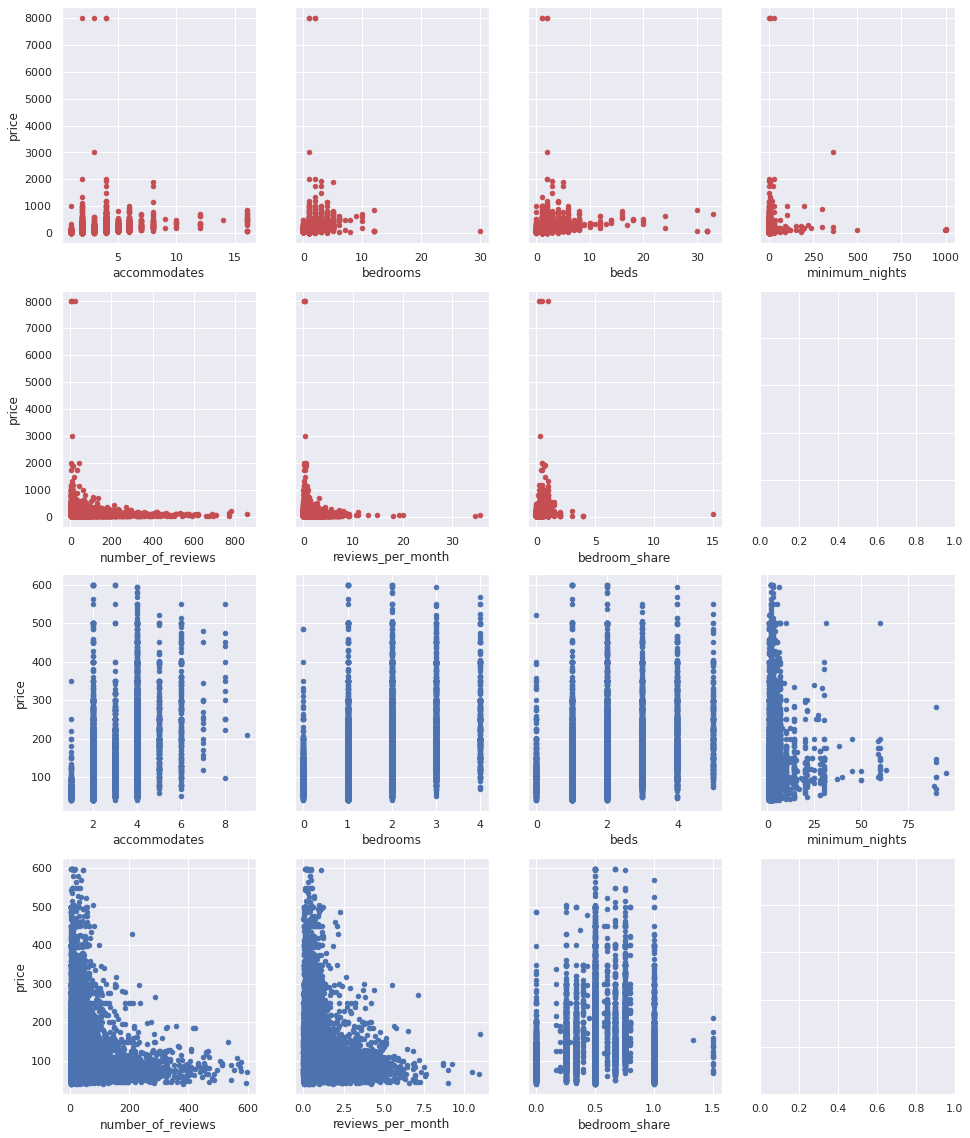

In [163]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(16, 20))
axes = np.ravel(axes)
col_name = ['accommodates','bedrooms','beds','minimum_nights','number_of_reviews','reviews_per_month','bedroom_share']
for i, c in zip(range(9), col_name):
    df.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='r')

# delete outliers
print(df.shape)
df = df[df['accommodates'] < 10]
df = df[df['bedrooms'] < 5]
df = df[df['beds'] < 6]
df = df[df['minimum_nights'] < 100]
df = df[df['number_of_reviews'] < 600]
df = df[df['reviews_per_month'] < 12]
df = df[df['bedroom_share'] < 2]
df = df[df['price'] < 600]
df = df[df['price'] > 40]

print(df.shape)

for i, c in zip(range(8,16), col_name):
    df.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='b')

## Neighbourhood vs Price

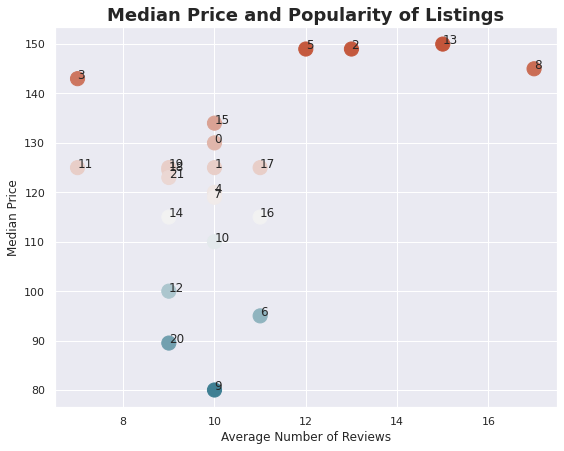

In [164]:
def plot_price_vs_popularity(df, top_k):
    x = df.groupby('cluster_location')[
        'number_of_reviews'].median().sort_index()[:top_k]
    y = df.groupby('cluster_location')[
        'price'].median().sort_index()[:top_k]
    n = (x.reset_index()).cluster_location.tolist()[:top_k]
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.scatter(x, y, c=y, cmap=sns.diverging_palette(
        220, 20, sep=20, as_cmap=True), s=200)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

    plt.xlabel('Average Number of Reviews')
    plt.ylabel('Median Price')
    plt.title('Median Price and Popularity of Listings',
              fontsize=18, fontweight='bold')
plot_price_vs_popularity(df, 22)

## Log transformation of price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

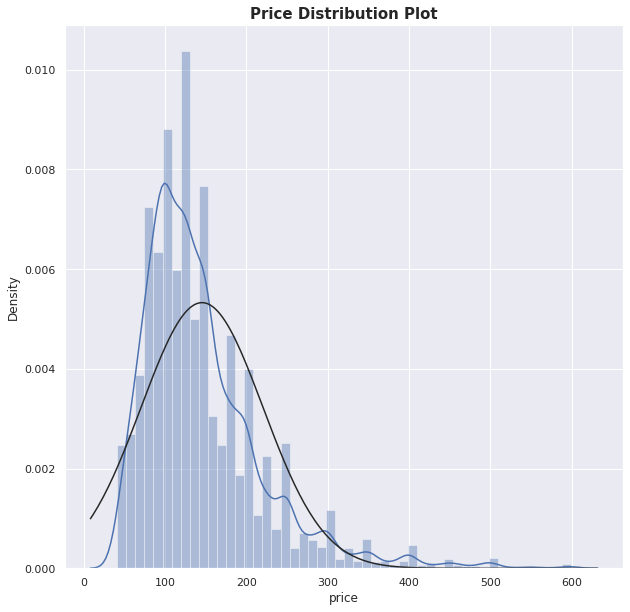

In [165]:
# visualize distribution of price (target)
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [166]:
df['price'].mean()

145.32624161073826

In [167]:
df['price'].median()

128.0

In [168]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

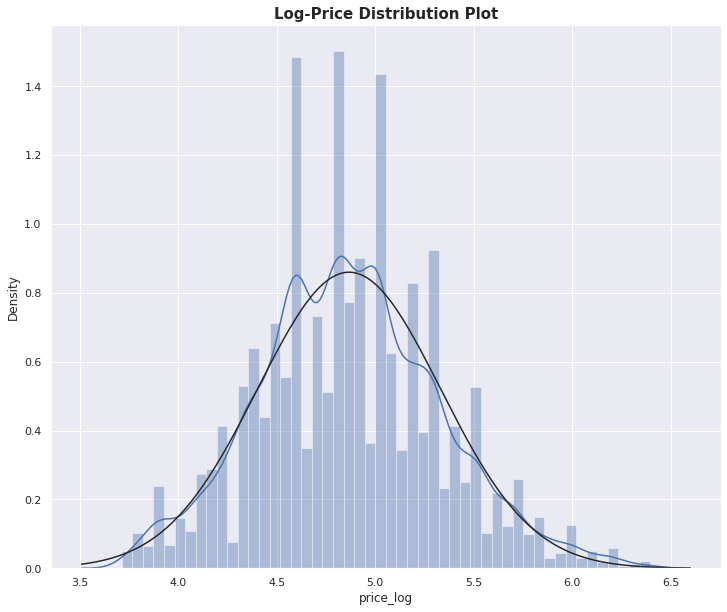

In [169]:
# visualize distribution of log price (target)
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [170]:
# calculate summary statistics
data_mean, data_std = np.mean(df['price_log']), np.std(df['price_log'])
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off

In [171]:
# identify outliers
outliers = [x for x in df['price_log'] if x < lower or x > upper]

In [172]:
# remove outliers
outliers_removed = [x for x in df['price_log'] if x > lower and x < upper]

In [173]:
df['price_log'].describe()

count    14900.000000
mean         4.867677
std          0.464143
min          3.713572
25%          4.564348
50%          4.852030
75%          5.164786
max          6.395262
Name: price_log, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot (after cut-off)')

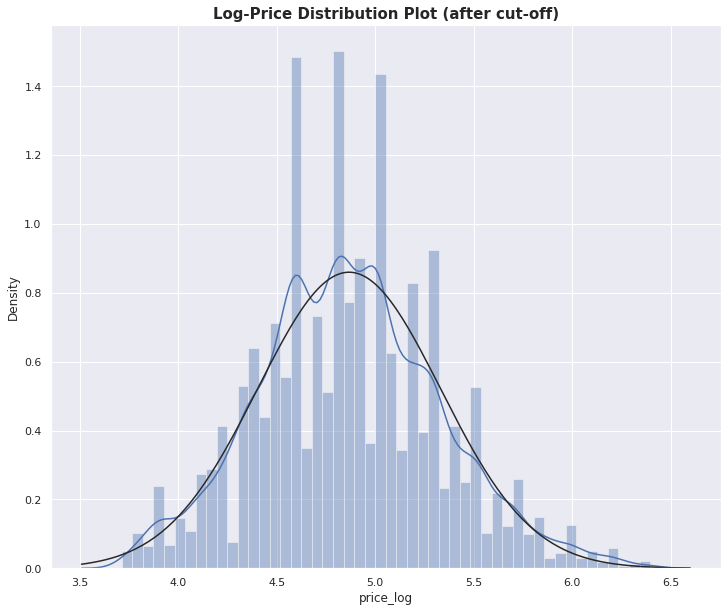

In [174]:
# visualize distribution of log price (target) after cut off
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot (after cut-off)",size=15, weight='bold')

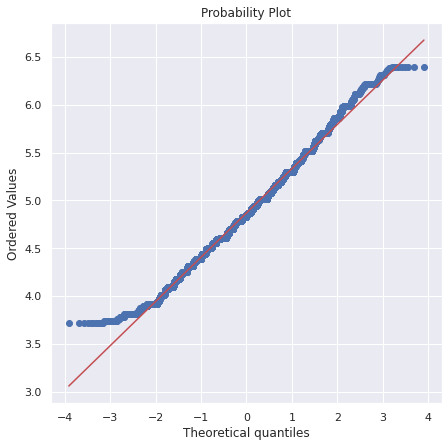

In [175]:
plt.figure(figsize=(7,7))
stats.probplot(df['price_log'], plot=plt)
plt.show()

In [176]:
df['price_log'].mean()

4.86767728509145

In [177]:
df['price_log'].median()

4.852030263919617

In [178]:
df.drop(['neighbourhood_cleansed'], axis = 1, inplace = True)
df.drop(['price'], axis = 1, inplace = True)

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

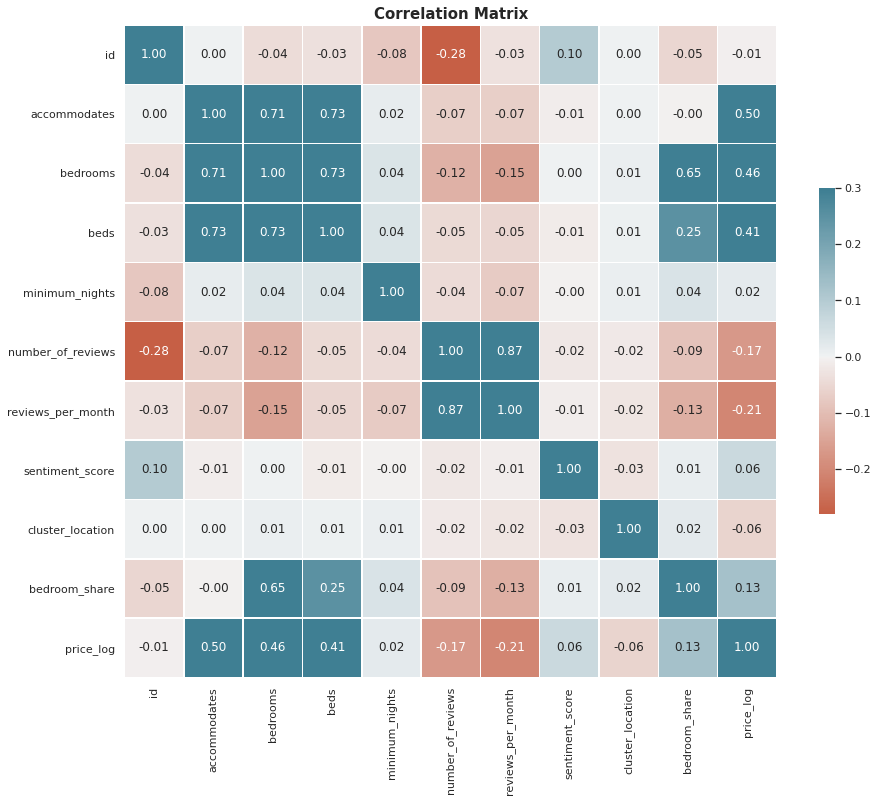

In [179]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [180]:
#dropping features
df.drop(['number_of_reviews'], axis = 1, inplace = True)
df.drop(['property_type'], axis = 1, inplace = True)
df.drop(['polarity'], axis = 1, inplace = True)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14900 entries, 0 to 15561
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      14900 non-null  int64  
 1   host_is_superhost       14900 non-null  object 
 2   host_identity_verified  14900 non-null  object 
 3   room_type               14900 non-null  object 
 4   accommodates            14900 non-null  int64  
 5   bedrooms                14900 non-null  float64
 6   beds                    14900 non-null  float64
 7   minimum_nights          14900 non-null  int64  
 8   reviews_per_month       14900 non-null  float64
 9   sentiment_score         14900 non-null  float64
 10  cluster_location        14900 non-null  int32  
 11  bedroom_share           14900 non-null  float64
 12  price_log               14900 non-null  float64
dtypes: float64(6), int32(1), int64(3), object(3)
memory usage: 1.5+ MB


In [182]:
df['cluster_location'] = df['cluster_location'].apply(str)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14900 entries, 0 to 15561
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      14900 non-null  int64  
 1   host_is_superhost       14900 non-null  object 
 2   host_identity_verified  14900 non-null  object 
 3   room_type               14900 non-null  object 
 4   accommodates            14900 non-null  int64  
 5   bedrooms                14900 non-null  float64
 6   beds                    14900 non-null  float64
 7   minimum_nights          14900 non-null  int64  
 8   reviews_per_month       14900 non-null  float64
 9   sentiment_score         14900 non-null  float64
 10  cluster_location        14900 non-null  object 
 11  bedroom_share           14900 non-null  float64
 12  price_log               14900 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.6+ MB


In [184]:
results = pd.DataFrame(df.drop('price_log', axis=1).corrwith(df.price_log).agg('square'), 
                       columns=['weight'])

ranks = np.zeros(len(results), dtype=np.int)
for i, j in enumerate(np.argsort(results.weight)[::-1]):
    ranks[j] = i
results['rank'] = ranks

results.sort_values('rank').loc[:, ['rank', 'weight']].iloc[0:10]

,rank,weight
accommodates,0,0.246892
bedrooms,1,0.216031
beds,2,0.164743
reviews_per_month,3,0.042265
bedroom_share,4,0.016053
sentiment_score,5,0.004219
minimum_nights,6,0.000355
id,7,0.000032


### Multicolinearity

Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

Multicollinearity will be control with Eigen vector values results.

In [185]:
#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
print("Eigen values:")
print(multicollinearity)
print("Eigen vector for value in position 2:")
print(V[:,2])
print("Eigen vector for value in position 3:")
print(V[:,3])

Eigen values:
[3.03772097 1.87144673 0.09483057 0.03654861 0.25160378 0.59726819
 1.18815431 0.85659856 1.06987571 1.02067555 0.97527703]
Eigen vector for value in position 2:
[-0.19625361 -0.00795061  0.00318302 -0.01484236  0.00285321 -0.70659678
  0.67884538  0.01168073  0.00641462  0.01126828  0.02771501]
Eigen vector for value in position 3:
[ 0.00853823 -0.49495013  0.72366917 -0.03747829  0.00182185  0.00547357
  0.00660767 -0.0022421   0.00372007 -0.47916897 -0.01229137]


## Dummy variables and splitting train data

In [186]:
#splitting
from sklearn.preprocessing import scale
y = df['price_log']
x = df.copy().drop('price_log', axis=1)


# creating dummy variables for categorical variables
create_categorical_dum = x.select_dtypes(include=['object'])
create_categorical_dum.head()

object_dum = pd.get_dummies(create_categorical_dum)
object_dum.head()
x = x.drop(list(create_categorical_dum.columns), axis=1)
x = pd.concat([x,object_dum], axis=1)

In [187]:
object_dum.head()

,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cluster_location_0,cluster_location_1,cluster_location_10,cluster_location_11,cluster_location_12,cluster_location_13,cluster_location_14,cluster_location_15,cluster_location_16,cluster_location_17,cluster_location_18,cluster_location_19,cluster_location_2,cluster_location_20,cluster_location_21,cluster_location_3,cluster_location_4,cluster_location_5,cluster_location_6,cluster_location_7,cluster_location_8,cluster_location_9
0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [188]:
object_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14900 entries, 0 to 15561
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   host_is_superhost_f        14900 non-null  uint8
 1   host_is_superhost_t        14900 non-null  uint8
 2   host_identity_verified_f   14900 non-null  uint8
 3   host_identity_verified_t   14900 non-null  uint8
 4   room_type_Entire home/apt  14900 non-null  uint8
 5   room_type_Hotel room       14900 non-null  uint8
 6   room_type_Private room     14900 non-null  uint8
 7   room_type_Shared room      14900 non-null  uint8
 8   cluster_location_0         14900 non-null  uint8
 9   cluster_location_1         14900 non-null  uint8
 10  cluster_location_10        14900 non-null  uint8
 11  cluster_location_11        14900 non-null  uint8
 12  cluster_location_12        14900 non-null  uint8
 13  cluster_location_13        14900 non-null  uint8
 14  cluster_location_14   

In [189]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
x.head()

,id,accommodates,bedrooms,beds,minimum_nights,reviews_per_month,sentiment_score,bedroom_share,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cluster_location_0,cluster_location_1,cluster_location_10,cluster_location_11,cluster_location_12,cluster_location_13,cluster_location_14,cluster_location_15,cluster_location_16,cluster_location_17,cluster_location_18,cluster_location_19,cluster_location_2,cluster_location_20,cluster_location_21,cluster_location_3,cluster_location_4,cluster_location_5,cluster_location_6,cluster_location_7,cluster_location_8,cluster_location_9
0,2818,2,1.0,2.0,3,1.92,0.748479,0.500000,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20168,2,1.0,1.0,1,2.54,0.547088,0.500000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,25428,3,1.0,1.0,14,0.13,1.045139,0.333333,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,27886,2,1.0,1.0,2,1.98,1.099645,0.500000,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,28871,2,1.0,1.0,2,2.63,0.909233,0.500000,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [190]:
x.drop(['id'], axis = 1, inplace = True)

In [191]:
results = pd.DataFrame(x.corrwith(y).agg('square'), 
                       columns=['weight'])

ranks = np.zeros(len(results), dtype=np.int)
for i, j in enumerate(np.argsort(results.weight)[::-1]):
    ranks[j] = i
results['rank'] = ranks

results.sort_values('rank').loc[:, ['rank', 'weight']].iloc[0:10]

,rank,weight
accommodates,0,0.246892
bedrooms,1,0.216031
room_type_Entire home/apt,2,0.186702
room_type_Private room,3,0.184828
beds,4,0.164743
reviews_per_month,5,0.042265
bedroom_share,6,0.016053
cluster_location_5,7,0.008983
cluster_location_9,8,0.008718
cluster_location_10,9,0.007614


In [192]:
x_without_sentiment = x.copy().drop('sentiment_score', axis=1)

In [193]:
print(y[0:5])

0    4.077537
1    4.859812
2    4.828314
3    4.828314
4    4.317488
Name: price_log, dtype: float64


In [194]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14900 entries, 0 to 15561
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accommodates               14900 non-null  int64  
 1   bedrooms                   14900 non-null  float64
 2   beds                       14900 non-null  float64
 3   minimum_nights             14900 non-null  int64  
 4   reviews_per_month          14900 non-null  float64
 5   sentiment_score            14900 non-null  float64
 6   bedroom_share              14900 non-null  float64
 7   host_is_superhost_f        14900 non-null  uint8  
 8   host_is_superhost_t        14900 non-null  uint8  
 9   host_identity_verified_f   14900 non-null  uint8  
 10  host_identity_verified_t   14900 non-null  uint8  
 11  room_type_Entire home/apt  14900 non-null  uint8  
 12  room_type_Hotel room       14900 non-null  uint8  
 13  room_type_Private room     14900 non-null  uin

In [195]:
x.to_pickle('x_data.pickle')
x_without_sentiment.to_pickle('x_without_sentiment.pickle')
y.to_pickle('y_data.pickle')

In [196]:
x_sentiment = x
y_without_sentiment = y
y_sentiment = y

## Models

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [198]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import sklearn as sklearn
import multiprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomTreesEmbedding
from sklearn.neural_network import MLPRegressor
# from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import Imputer
from sklearn import metrics
# import statsmodels.api as sm

from keras.models import Sequential
from keras.layers import Dense

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x_sentiment, y_sentiment, test_size=0.2,random_state=42)

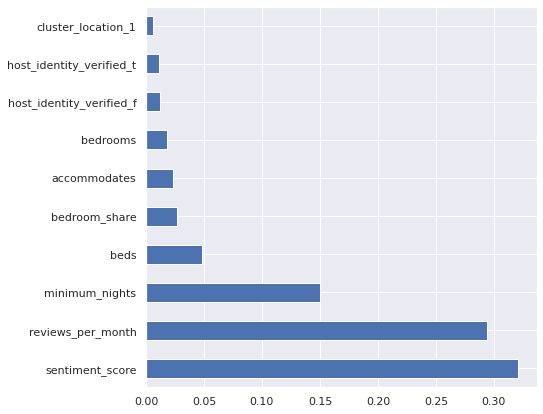

In [200]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(x_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=x.iloc[:,:].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [201]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

### Polynomial transformation

In [202]:
polynomial_features= PolynomialFeatures(degree=4)
polynomial_features.fit_transform(x_train)
polynomial_features.fit_transform(x_test)

array([[ 1.00000000e+00,  2.05383485e-01,  7.72613784e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       [ 1.00000000e+00, -7.42638178e-01, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       [ 1.00000000e+00, -7.42638178e-01, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       ...,
       [ 1.00000000e+00, -7.42638178e-01, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       [ 1.00000000e+00, -7.42638178e-01, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       [ 1.00000000e+00,  1.15340515e+00, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05]])

### Phase 1 - Models with sentiment score

GridSearch

In [203]:
#GridSearch

from sklearn.model_selection import KFold
from joblib import load, dump


#
def getkey(model):
  return pd.Series(model.get_params().keys())



def gridsearch(models,paramgrid, input_x, input_y, folds):
    ## Defining parameters
    model= models
    kf = KFold(n_splits = folds,random_state = 0)

    scores = {"r2":"r2",
              "mae":"neg_mean_absolute_error",
              "mse":"neg_mean_squared_error",
              "rmse":"neg_root_mean_squared_error",
              "meae":"neg_median_absolute_error"}


    # prepare a range of alpha values to test
    #alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    #normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search = GridSearchCV(estimator=model,  
                         param_grid=paramgrid,
                         scoring=scores,
                         cv=kf,
                         refit = "r2",
                         n_jobs=-1,
                         verbose = 2)
    
    grid_search.fit(input_x, input_y)
    #we can save the gs, maybe handy
    #dump(grid_search)

    best_mod = models.set_params(**grid_search.best_params_).fit(input_x, input_y)

    ## Lastly, finding the best parameters.

    return grid_search, best_mod


def extractgsscores(gs):
    results = pd.DataFrame(gs.cv_results_)
    for key in list(results.keys()):
      if "split" in key:
        del results[key]
      if "time" in key:
        del results[key]
    return pd.DataFrame(results)

#evaluate(gs,"nameofsavefile")
def evaluate(gridsearchmodel, name, X_test, y_test):
    y_pred = gridsearchmodel.best_estimator_.predict(X_test)
    print(gridsearchmodel.best_score_) 
    print(gridsearchmodel.cv_results_['params'][gridsearchmodel.best_index_])
    
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

    #make it into csv file
    res = extractgsscores(gridsearchmodel)
    #remove this line if we dont want to save to drive/local
    res.to_csv(str('./') + name +str('.csv'))
    return extractgsscores(gridsearchmodel)

**Linear Regression**





In [204]:
from sklearn.feature_selection import RFE

In [205]:
model_Linear = LinearRegression()
getkey(model_Linear)

0           copy_X
1    fit_intercept
2           n_jobs
3        normalize
dtype: object

In [206]:
Linear_par = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Linear_grid, Linear_best = gridsearch(model_Linear,Linear_par,x_train,y_train,5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 out of  40 | elapsed:    3.0s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done  24 out of  40 | elapsed:    3.7s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.9s finished


In [208]:
print(Linear_best)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [209]:
evaluate(Linear_grid,"Linear_grid",x_test, y_test)

0.4449942509656415
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
explained_variance:  0.4409
mean_squared_log_error:  0.0034
r2:  0.4386
MAE:  0.2629
MSE:  0.116
RMSE:  0.3407


,param_copy_X,param_fit_intercept,param_normalize,params,mean_test_r2,std_test_r2,rank_test_r2,mean_test_mae,std_test_mae,rank_test_mae,mean_test_mse,std_test_mse,rank_test_mse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_test_meae,std_test_meae,rank_test_meae
0,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.444781,0.015470,3,-0.267556,0.003274,3,-0.120579,0.003797,3,-0.347202,0.005477,3,-0.214042,0.002009,3
1,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.444994,0.015575,1,-0.267454,0.003299,1,-0.120533,0.003828,1,-0.347135,0.005525,1,-0.213241,0.002547,1
2,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'norm...",-112.549647,4.388628,5,-4.866645,0.022628,5,-24.675553,1.373972,5,-4.965598,0.135590,5,-4.881930,0.011781,5
3,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'norm...",-112.549647,4.388628,5,-4.866645,0.022628,5,-24.675553,1.373972,5,-4.965598,0.135590,5,-4.881930,0.011781,5
4,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.444781,0.015470,3,-0.267556,0.003274,3,-0.120579,0.003797,3,-0.347202,0.005477,3,-0.214042,0.002009,3
5,False,True,False,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.444994,0.015575,1,-0.267454,0.003299,1,-0.120533,0.003828,1,-0.347135,0.005525,1,-0.213241,0.002547,1
6,False,False,True,"{'copy_X': False, 'fit_intercept': False, 'nor...",-112.549647,4.388628,5,-4.866645,0.022628,5,-24.675553,1.373972,5,-4.965598,0.135590,5,-4.881930,0.011781,5
7,False,False,False,"{'copy_X': False, 'fit_intercept': False, 'nor...",-112.549647,4.388628,5,-4.866645,0.022628,5,-24.675553,1.373972,5,-4.965598,0.135590,5,-4.881930,0.011781,5


In [210]:
##Linear Regression
lr = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lr.fit(x_train, y_train)
pred_lr_train= lr.predict(x_train)
pred_lr_test= lr.predict(x_test)

**Ridge Regression**

In [212]:
model_Ridge = Ridge()
getkey(model_Ridge)

0            alpha
1           copy_X
2    fit_intercept
3         max_iter
4        normalize
5     random_state
6           solver
7              tol
dtype: object

In [213]:
Ridge_par = {'alpha': np.array([1.0,0.1,0.01,0.001,0.0001,0]), 'copy_X':[True, False], 'normalize':[True,False]}
Ridge_grid, Ridge_best = gridsearch(model_Ridge,Ridge_par,x_train,y_train,5)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 out of 120 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.0s finished


In [214]:
print(Ridge_best)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)


In [215]:
evaluate(Ridge_grid,"Ridge_grid",x_test, y_test)

0.44485537571614886
{'alpha': 0.001, 'copy_X': True, 'normalize': True}
explained_variance:  0.4409
mean_squared_log_error:  0.0034
r2:  0.4386
MAE:  0.263
MSE:  0.1161
RMSE:  0.3407


,param_alpha,param_copy_X,param_normalize,params,mean_test_r2,std_test_r2,rank_test_r2,mean_test_mae,std_test_mae,rank_test_mae,mean_test_mse,std_test_mse,rank_test_mse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_test_meae,std_test_meae,rank_test_meae
0,1,True,True,"{'alpha': 1.0, 'copy_X': True, 'normalize': True}",0.395247,0.010330,23,-0.282379,0.003493,23,-0.131363,0.003927,23,-0.362399,0.005440,23,-0.229115,0.003621,23
1,1,True,False,"{'alpha': 1.0, 'copy_X': True, 'normalize': Fa...",0.444852,0.015492,3,-0.267524,0.003311,11,-0.120565,0.003843,5,-0.347181,0.005546,5,-0.213412,0.002459,13
2,1,False,True,"{'alpha': 1.0, 'copy_X': False, 'normalize': T...",0.395247,0.010330,23,-0.282379,0.003493,23,-0.131363,0.003927,23,-0.362399,0.005440,23,-0.229115,0.003621,23
3,1,False,False,"{'alpha': 1.0, 'copy_X': False, 'normalize': F...",0.444852,0.015492,3,-0.267524,0.003311,11,-0.120565,0.003843,5,-0.347181,0.005546,5,-0.213412,0.002459,13
4,0.1,True,True,"{'alpha': 0.1, 'copy_X': True, 'normalize': True}",0.443187,0.015174,19,-0.268278,0.003419,19,-0.120928,0.003830,19,-0.347704,0.005519,19,-0.214938,0.002415,21
5,0.1,True,False,"{'alpha': 0.1, 'copy_X': True, 'normalize': Fa...",0.444851,0.015492,9,-0.267524,0.003311,7,-0.120565,0.003843,9,-0.347181,0.005546,9,-0.213398,0.002440,9
6,0.1,False,True,"{'alpha': 0.1, 'copy_X': False, 'normalize': T...",0.443187,0.015174,19,-0.268278,0.003419,19,-0.120928,0.003830,19,-0.347704,0.005519,19,-0.214938,0.002415,21
7,0.1,False,False,"{'alpha': 0.1, 'copy_X': False, 'normalize': F...",0.444851,0.015492,9,-0.267524,0.003311,7,-0.120565,0.003843,9,-0.347181,0.005546,9,-0.213398,0.002440,9
8,0.01,True,True,"{'alpha': 0.01, 'copy_X': True, 'normalize': T...",0.444852,0.015525,7,-0.267551,0.003340,17,-0.120565,0.003845,3,-0.347181,0.005548,3,-0.213628,0.002247,17
9,0.01,True,False,"{'alpha': 0.01, 'copy_X': True, 'normalize': F...",0.444851,0.015492,11,-0.267524,0.003311,5,-0.120565,0.003843,11,-0.347181,0.005546,11,-0.213398,0.002440,3


In [216]:
#Ridge Model
ridge_model = Ridge(alpha = 0.0, normalize = True)
ridge_model.fit(x_train, y_train)
pred_ridge_train = ridge_model.predict(x_train)             
pred_ridge_test = ridge_model.predict(x_test) 

**Support Vector Regression (SVR)**

In [217]:
model_SVR = SVR()
getkey(model_SVR)

0              C
1     cache_size
2          coef0
3         degree
4        epsilon
5          gamma
6         kernel
7       max_iter
8      shrinking
9            tol
10       verbose
dtype: object

In [218]:
SVR_par = {'kernel' : ['rbf'],'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
SVR_grid, SVR_best = gridsearch(model_SVR,SVR_par,x_train,y_train,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


In [219]:
print(SVR_best)

SVR(C=1, cache_size=200, coef0=0.01, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [220]:
evaluate(SVR_grid,"SVR_grid",x_test, y_test)

0.4348913659519641
{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
explained_variance:  0.4404
mean_squared_log_error:  0.0034
r2:  0.4395
MAE:  0.2622
MSE:  0.1159
RMSE:  0.3404


,param_C,param_coef0,param_degree,param_gamma,param_kernel,params,mean_test_r2,std_test_r2,rank_test_r2,mean_test_mae,std_test_mae,rank_test_mae,mean_test_mse,std_test_mse,rank_test_mse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_test_meae,std_test_meae,rank_test_meae
0,1,0.01,3,auto,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",0.434851,0.019277,7,-0.269605,0.002987,7,-0.122721,0.004124,7,-0.350266,0.005930,7,-0.218559,0.004724,1
1,1,0.01,3,scale,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",0.434891,0.019311,1,-0.269596,0.003004,1,-0.122712,0.004129,1,-0.350253,0.005938,1,-0.218633,0.004771,7
2,1,0.01,8,auto,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 8, 'gamma': ...",0.434851,0.019277,7,-0.269605,0.002987,7,-0.122721,0.004124,7,-0.350266,0.005930,7,-0.218559,0.004724,1
3,1,0.01,8,scale,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 8, 'gamma': ...",0.434891,0.019311,1,-0.269596,0.003004,1,-0.122712,0.004129,1,-0.350253,0.005938,1,-0.218633,0.004771,7
4,1,10,3,auto,rbf,"{'C': 1, 'coef0': 10, 'degree': 3, 'gamma': 'a...",0.434851,0.019277,7,-0.269605,0.002987,7,-0.122721,0.004124,7,-0.350266,0.005930,7,-0.218559,0.004724,1
5,1,10,3,scale,rbf,"{'C': 1, 'coef0': 10, 'degree': 3, 'gamma': 's...",0.434891,0.019311,1,-0.269596,0.003004,1,-0.122712,0.004129,1,-0.350253,0.005938,1,-0.218633,0.004771,7
6,1,10,8,auto,rbf,"{'C': 1, 'coef0': 10, 'degree': 8, 'gamma': 'a...",0.434851,0.019277,7,-0.269605,0.002987,7,-0.122721,0.004124,7,-0.350266,0.005930,7,-0.218559,0.004724,1
7,1,10,8,scale,rbf,"{'C': 1, 'coef0': 10, 'degree': 8, 'gamma': 's...",0.434891,0.019311,1,-0.269596,0.003004,1,-0.122712,0.004129,1,-0.350253,0.005938,1,-0.218633,0.004771,7
8,1,0.5,3,auto,rbf,"{'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': '...",0.434851,0.019277,7,-0.269605,0.002987,7,-0.122721,0.004124,7,-0.350266,0.005930,7,-0.218559,0.004724,1
9,1,0.5,3,scale,rbf,"{'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': '...",0.434891,0.019311,1,-0.269596,0.003004,1,-0.122712,0.004129,1,-0.350253,0.005938,1,-0.218633,0.004771,7


In [221]:
#SVR Model
SVR_model = SVR(C=1, coef0=0.01, degree= 3, gamma= 'auto', kernel= 'rbf')
SVR_model.fit(x_train, y_train)
pred_SVR_train = SVR_model.predict(x_train)             
pred_SVR_test = SVR_model.predict(x_test) 

**XGBoost**

In [222]:
from xgboost.sklearn import XGBRegressor

In [223]:
model_XGB = XGBRegressor()
getkey(model_XGB)

0            base_score
1               booster
2     colsample_bylevel
3      colsample_bynode
4      colsample_bytree
5                 gamma
6       importance_type
7         learning_rate
8        max_delta_step
9             max_depth
10     min_child_weight
11              missing
12         n_estimators
13               n_jobs
14              nthread
15            objective
16         random_state
17            reg_alpha
18           reg_lambda
19     scale_pos_weight
20                 seed
21               silent
22            subsample
23            verbosity
dtype: object

In [224]:
XGB_par = {'nthread':[1], #when use hyperthread, xgboost may become slower
            'objective':['reg:linear'],
            'learning_rate': [.03, 0.05, .07], #so called `eta` value
            'max_depth': [5, 6, 7],
            'min_child_weight': [4],
            'silent': [1],
            'subsample': [0.7],
            'colsample_bytree': [0.7],
            'n_estimators': [500]}
XGB_grid, XGB_best = gridsearch(model_XGB,XGB_par,x_train,y_train,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:   11.9s remaining:   32.7s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:   15.0s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   21.9s finished


In [225]:
print(XGB_best)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [226]:
evaluate(XGB_grid,"XGB_grid",x_test, y_test)

0.45853611177029785
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 1, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
explained_variance:  0.4624
mean_squared_log_error:  0.0032
r2:  0.461
MAE:  0.2567
MSE:  0.1114
RMSE:  0.3338


,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_silent,param_subsample,params,mean_test_r2,std_test_r2,rank_test_r2,mean_test_mae,std_test_mae,rank_test_mae,mean_test_mse,std_test_mse,rank_test_mse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_test_meae,std_test_meae,rank_test_meae
0,0.7,0.03,5,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.458536,0.012554,1,-0.263571,0.003009,1,-0.117591,0.003186,1,-0.342884,0.004657,1,-0.211840,0.002639,1
1,0.7,0.03,6,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.455468,0.012601,2,-0.264526,0.002859,2,-0.118254,0.003092,2,-0.343852,0.004506,2,-0.212490,0.002929,2
2,0.7,0.03,7,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.450679,0.010661,4,-0.265910,0.002936,4,-0.119308,0.003266,4,-0.345378,0.004750,4,-0.214837,0.003334,5
3,0.7,0.05,5,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.451754,0.013106,3,-0.265156,0.002689,3,-0.119055,0.002976,3,-0.345016,0.004320,3,-0.213283,0.000969,3
4,0.7,0.05,6,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.443553,0.012512,6,-0.267455,0.002850,6,-0.120841,0.003062,6,-0.347594,0.004417,6,-0.216571,0.002374,6
5,0.7,0.05,7,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.437095,0.010832,7,-0.269089,0.002794,7,-0.122249,0.002982,7,-0.349615,0.004280,7,-0.216745,0.003491,7
6,0.7,0.07,5,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.443672,0.013126,5,-0.267199,0.003262,5,-0.120820,0.003364,5,-0.347558,0.004854,5,-0.214788,0.003241,4
7,0.7,0.07,6,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.430485,0.012774,8,-0.270850,0.002914,8,-0.123678,0.003087,8,-0.351651,0.004400,8,-0.220088,0.001506,8
8,0.7,0.07,7,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.418942,0.011413,9,-0.273460,0.002347,9,-0.126181,0.002656,9,-0.355199,0.003756,9,-0.221075,0.002055,9


In [227]:
#XGBoost model
XGB_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)
XGB_model.fit(x_train, y_train)
pred_XGB_train = XGB_model.predict(x_train)             
pred_XGB_test = XGB_model.predict(x_test) 

**Regression based Neural Network**

In [228]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot, plot_model
from IPython.display import SVG
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(1)
def NeuralNetwork():
  model = Sequential()
  model.add(Dense(units=48, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(24, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

  print(model.summary())
  return model

# Training the model
NeuralN = NeuralNetwork()
NeuralN_history = NeuralN.fit(x_train, y_train, epochs = 20, batch_size=30, validation_split= 0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                1824      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 4,729
Trainable params: 4,729
Non-trainable params: 0
______________________________________________________

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 48)                1824      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_8 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 4,729
Trainable params: 4,729
Non-trainable params: 0
____________________________________________________

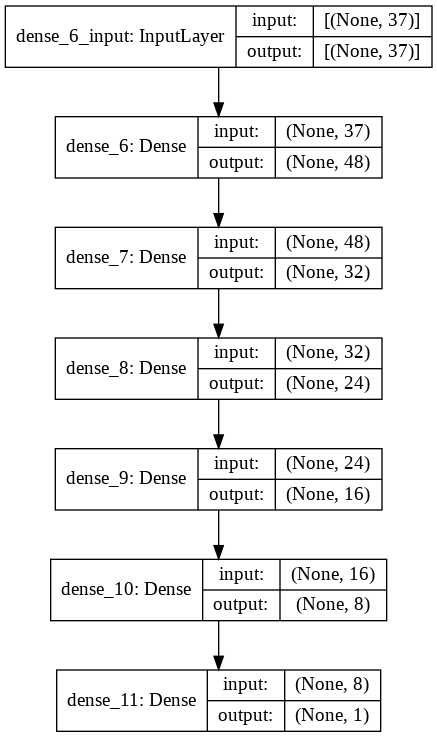

In [229]:
#model architecture
plot_model(NeuralNetwork(), to_file='model.png', show_shapes=True, show_layer_names=True)


In [230]:
# list all data in history
print(NeuralN_history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


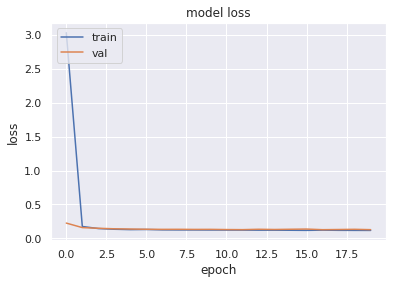

In [231]:
# "Loss"
plt.plot(NeuralN_history.history['loss'])
plt.plot(NeuralN_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [232]:
pred_NeuralN_train = NeuralN.predict(x_train)            
pred_NeuralN_test = NeuralN.predict(x_test) 

### Phase 2 - models without sentiment score

In [233]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_without_sentiment, y_without_sentiment, test_size=0.2,random_state=42)

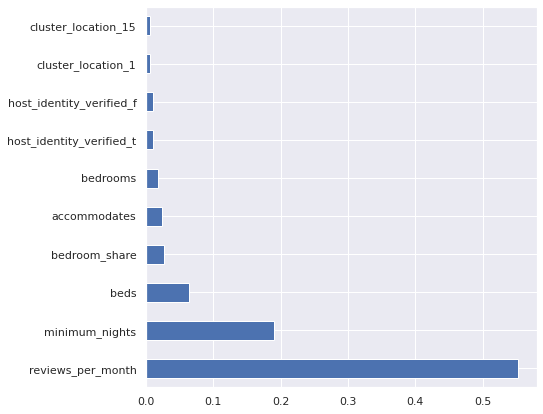

In [234]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(x_train2,lab_enc.fit_transform(y_train2))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=x_without_sentiment.iloc[:,:].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [235]:
scaler.fit(x_without_sentiment)
x_train2 = scaler.transform(x_train2)
x_test2  = scaler.transform(x_test2)

In [236]:
polynomial_features= PolynomialFeatures(degree=4)
polynomial_features.fit_transform(x_train2)
polynomial_features.fit_transform(x_test2)

array([[ 1.00000000e+00,  2.05383485e-01,  7.72613784e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       [ 1.00000000e+00, -7.42638178e-01, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       [ 1.00000000e+00, -7.42638178e-01, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       ...,
       [ 1.00000000e+00, -7.42638178e-01, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       [ 1.00000000e+00, -7.42638178e-01, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05],
       [ 1.00000000e+00,  1.15340515e+00, -5.08484078e-01, ...,
         7.34542684e-04,  2.70050827e-04,  9.92827927e-05]])

**Linear Regression 2**

In [237]:
model_Linear2 = LinearRegression()
Linear_par2 = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Linear_grid2, Linear_best2 = gridsearch(model_Linear2,Linear_par,x_train2,y_train2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  40 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  24 out of  40 | elapsed:    0.1s remaining:    0.1s


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [238]:
evaluate(Linear_grid2,"Linear_grid2",x_test2, y_test2)

0.4440141808031884
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
explained_variance:  0.4411
mean_squared_log_error:  0.0034
r2:  0.4388
MAE:  0.2629
MSE:  0.116
RMSE:  0.3406


,param_copy_X,param_fit_intercept,param_normalize,params,mean_test_r2,std_test_r2,rank_test_r2,mean_test_mae,std_test_mae,rank_test_mae,mean_test_mse,std_test_mse,rank_test_mse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_test_meae,std_test_meae,rank_test_meae
0,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.443768,0.015627,3,-0.267859,0.003326,3,-0.120792,0.003615,3,-0.347513,0.005206,3,-0.213880,0.003527,3
1,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.444014,0.015733,1,-0.267837,0.003351,1,-0.120740,0.003676,1,-0.347436,0.005296,1,-0.213766,0.003305,1
2,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'norm...",-111.477399,6.853167,5,-4.862597,0.029083,5,-24.398104,0.927791,5,-4.938575,0.092646,5,-4.804543,0.128015,5
3,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'norm...",-111.477399,6.853167,5,-4.862597,0.029083,5,-24.398104,0.927791,5,-4.938575,0.092646,5,-4.804543,0.128015,5
4,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.443768,0.015627,3,-0.267859,0.003326,3,-0.120792,0.003615,3,-0.347513,0.005206,3,-0.213880,0.003527,3
5,False,True,False,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.444014,0.015733,1,-0.267837,0.003351,1,-0.120740,0.003676,1,-0.347436,0.005296,1,-0.213766,0.003305,1
6,False,False,True,"{'copy_X': False, 'fit_intercept': False, 'nor...",-111.477399,6.853167,5,-4.862597,0.029083,5,-24.398104,0.927791,5,-4.938575,0.092646,5,-4.804543,0.128015,5
7,False,False,False,"{'copy_X': False, 'fit_intercept': False, 'nor...",-111.477399,6.853167,5,-4.862597,0.029083,5,-24.398104,0.927791,5,-4.938575,0.092646,5,-4.804543,0.128015,5


In [239]:
##Linear Regression
lr2 = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lr2.fit(x_train2, y_train2)
pred_lr_train2= lr2.predict(x_train2)
pred_lr_test2= lr2.predict(x_test2)

**Ridge Regression 2**

In [240]:
model_Ridge2 = Ridge()
Ridge_par2 = {'alpha': np.array([1.0,0.1,0.01,0.001,0.0001,0]), 'copy_X':[True, False], 'normalize':[True,False]}
Ridge_grid2, Ridge_best2 = gridsearch(model_Ridge2,Ridge_par2,x_train2,y_train2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 102 out of 120 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.6s finished


In [241]:
evaluate(Ridge_grid2,"Ridge_grid2",x_test2, y_test2)

0.4440129526899909
{'alpha': 0.001, 'copy_X': True, 'normalize': True}
explained_variance:  0.4411
mean_squared_log_error:  0.0034
r2:  0.4388
MAE:  0.2629
MSE:  0.116
RMSE:  0.3406


,param_alpha,param_copy_X,param_normalize,params,mean_test_r2,std_test_r2,rank_test_r2,mean_test_mae,std_test_mae,rank_test_mae,mean_test_mse,std_test_mse,rank_test_mse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_test_meae,std_test_meae,rank_test_meae
0,1,True,True,"{'alpha': 1.0, 'copy_X': True, 'normalize': True}",0.393871,0.010169,23,-0.282758,0.003509,23,-0.131657,0.003772,23,-0.362809,0.005218,23,-0.228943,0.003702,23
1,1,True,False,"{'alpha': 1.0, 'copy_X': True, 'normalize': Fa...",0.444010,0.015682,3,-0.267844,0.003343,11,-0.120742,0.003679,3,-0.347438,0.005300,3,-0.213715,0.003310,7
2,1,False,True,"{'alpha': 1.0, 'copy_X': False, 'normalize': T...",0.393871,0.010169,23,-0.282758,0.003509,23,-0.131657,0.003772,23,-0.362809,0.005218,23,-0.228943,0.003702,23
3,1,False,False,"{'alpha': 1.0, 'copy_X': False, 'normalize': F...",0.444010,0.015682,3,-0.267844,0.003343,11,-0.120742,0.003679,3,-0.347438,0.005300,3,-0.213715,0.003310,7
4,0.1,True,True,"{'alpha': 0.1, 'copy_X': True, 'normalize': True}",0.442276,0.015300,21,-0.268600,0.003477,21,-0.121120,0.003654,21,-0.347983,0.005257,21,-0.215069,0.001814,21
5,0.1,True,False,"{'alpha': 0.1, 'copy_X': True, 'normalize': Fa...",0.444009,0.015682,7,-0.267844,0.003343,7,-0.120742,0.003679,7,-0.347439,0.005300,7,-0.213721,0.003300,11
6,0.1,False,True,"{'alpha': 0.1, 'copy_X': False, 'normalize': T...",0.442276,0.015300,21,-0.268600,0.003477,21,-0.121120,0.003654,21,-0.347983,0.005257,21,-0.215069,0.001814,21
7,0.1,False,False,"{'alpha': 0.1, 'copy_X': False, 'normalize': F...",0.444009,0.015682,7,-0.267844,0.003343,7,-0.120742,0.003679,7,-0.347439,0.005300,7,-0.213721,0.003300,11
8,0.01,True,True,"{'alpha': 0.01, 'copy_X': True, 'normalize': T...",0.444004,0.015712,15,-0.267871,0.003371,17,-0.120743,0.003679,15,-0.347440,0.005301,15,-0.213797,0.003339,19
9,0.01,True,False,"{'alpha': 0.01, 'copy_X': True, 'normalize': F...",0.444009,0.015682,9,-0.267844,0.003343,5,-0.120742,0.003679,9,-0.347439,0.005300,9,-0.213721,0.003299,13


In [242]:
ridge_model2 = Ridge(alpha = 0.01, normalize = True, copy_X= True)
ridge_model2.fit(x_train2, y_train2)
pred_ridge_train2 = ridge_model2.predict(x_train2)             
pred_ridge_test2 = ridge_model2.predict(x_test2) 

**SVR2**

In [243]:
model_SVR2 = SVR()
SVR_par2 = {'kernel' : ['rbf'],'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
SVR_grid2, SVR_best2 = gridsearch(model_SVR2,SVR_par2,x_train2,y_train2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.6min finished


In [244]:
evaluate(SVR_grid2,"SVR_grid2",x_test2, y_test2)

0.4370020119360998
{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
explained_variance:  0.4424
mean_squared_log_error:  0.0034
r2:  0.4415
MAE:  0.2615
MSE:  0.1155
RMSE:  0.3398


,param_C,param_coef0,param_degree,param_gamma,param_kernel,params,mean_test_r2,std_test_r2,rank_test_r2,mean_test_mae,std_test_mae,rank_test_mae,mean_test_mse,std_test_mse,rank_test_mse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_test_meae,std_test_meae,rank_test_meae
0,1,0.01,3,auto,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",0.436971,0.016529,7,-0.269347,0.002300,7,-0.122259,0.003482,7,-0.349620,0.005002,7,-0.217030,0.003219,1
1,1,0.01,3,scale,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",0.437002,0.016583,1,-0.269333,0.002323,1,-0.122252,0.003491,1,-0.349610,0.005014,1,-0.217138,0.003163,7
2,1,0.01,8,auto,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 8, 'gamma': ...",0.436971,0.016529,7,-0.269347,0.002300,7,-0.122259,0.003482,7,-0.349620,0.005002,7,-0.217030,0.003219,1
3,1,0.01,8,scale,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 8, 'gamma': ...",0.437002,0.016583,1,-0.269333,0.002323,1,-0.122252,0.003491,1,-0.349610,0.005014,1,-0.217138,0.003163,7
4,1,10,3,auto,rbf,"{'C': 1, 'coef0': 10, 'degree': 3, 'gamma': 'a...",0.436971,0.016529,7,-0.269347,0.002300,7,-0.122259,0.003482,7,-0.349620,0.005002,7,-0.217030,0.003219,1
5,1,10,3,scale,rbf,"{'C': 1, 'coef0': 10, 'degree': 3, 'gamma': 's...",0.437002,0.016583,1,-0.269333,0.002323,1,-0.122252,0.003491,1,-0.349610,0.005014,1,-0.217138,0.003163,7
6,1,10,8,auto,rbf,"{'C': 1, 'coef0': 10, 'degree': 8, 'gamma': 'a...",0.436971,0.016529,7,-0.269347,0.002300,7,-0.122259,0.003482,7,-0.349620,0.005002,7,-0.217030,0.003219,1
7,1,10,8,scale,rbf,"{'C': 1, 'coef0': 10, 'degree': 8, 'gamma': 's...",0.437002,0.016583,1,-0.269333,0.002323,1,-0.122252,0.003491,1,-0.349610,0.005014,1,-0.217138,0.003163,7
8,1,0.5,3,auto,rbf,"{'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': '...",0.436971,0.016529,7,-0.269347,0.002300,7,-0.122259,0.003482,7,-0.349620,0.005002,7,-0.217030,0.003219,1
9,1,0.5,3,scale,rbf,"{'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': '...",0.437002,0.016583,1,-0.269333,0.002323,1,-0.122252,0.003491,1,-0.349610,0.005014,1,-0.217138,0.003163,7


In [245]:
SVR_model2 = SVR(C=1, coef0=0.01, degree= 3, gamma= 'auto', kernel= 'rbf')
SVR_model2.fit(x_train2, y_train2)
pred_SVR_train2 = SVR_model2.predict(x_train2)             
pred_SVR_test2 = SVR_model2.predict(x_test2) 

**XGBoost2**

In [246]:
model_XGB2 = XGBRegressor()
XGB_par2 = {'nthread':[1], #when use hyperthread, xgboost may become slower
            'objective':['reg:linear'],
            'learning_rate': [.03, 0.05, .07], #so called `eta` value
            'max_depth': [5, 6, 7],
            'min_child_weight': [4],
            'silent': [1],
            'subsample': [0.7],
            'colsample_bytree': [0.7],
            'n_estimators': [500]}
XGB_grid2, XGB_best2 = gridsearch(model_XGB2,XGB_par2,x_train2,y_train2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:   11.3s remaining:   31.0s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:   14.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   21.0s finished


In [247]:
evaluate(XGB_grid2,"XGB_grid2",x_test2, y_test2)

0.45809038289659254
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 1, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
explained_variance:  0.4615
mean_squared_log_error:  0.0033
r2:  0.4599
MAE:  0.2578
MSE:  0.1117
RMSE:  0.3342


,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_silent,param_subsample,params,mean_test_r2,std_test_r2,rank_test_r2,mean_test_mae,std_test_mae,rank_test_mae,mean_test_mse,std_test_mse,rank_test_mse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_test_meae,std_test_meae,rank_test_meae
0,0.7,0.03,5,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.458090,0.014632,1,-0.263893,0.002622,1,-0.117667,0.002838,1,-0.343001,0.004135,1,-0.211753,0.002219,1
1,0.7,0.03,6,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.455574,0.014112,2,-0.264562,0.002506,2,-0.118216,0.002812,2,-0.343801,0.004093,2,-0.213073,0.002707,2
2,0.7,0.03,7,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.449719,0.014140,4,-0.265971,0.002454,4,-0.119485,0.002717,4,-0.345643,0.003927,4,-0.214205,0.003793,4
3,0.7,0.05,5,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.451429,0.015206,3,-0.265845,0.002722,3,-0.119111,0.002887,3,-0.345100,0.004170,3,-0.213350,0.002706,3
4,0.7,0.05,6,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.444805,0.015708,5,-0.267308,0.002913,5,-0.120549,0.002982,5,-0.347175,0.004284,5,-0.215327,0.001903,5
5,0.7,0.05,7,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.431065,0.016189,7,-0.270548,0.002754,7,-0.123531,0.003023,7,-0.351444,0.004299,7,-0.218133,0.002708,7
6,0.7,0.07,5,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.444120,0.015919,6,-0.267378,0.002916,6,-0.120696,0.002968,6,-0.347387,0.004270,6,-0.215490,0.003404,6
7,0.7,0.07,6,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.428216,0.016573,8,-0.271282,0.002962,8,-0.124147,0.003001,8,-0.352319,0.004261,8,-0.220229,0.003227,8
8,0.7,0.07,7,4,500,1,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.409820,0.015838,9,-0.275780,0.002989,9,-0.128150,0.003163,9,-0.357954,0.004415,9,-0.223635,0.001655,9


In [248]:
print(XGB_best2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [249]:
XGB_model2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)
XGB_model2.fit(x_train2, y_train2)
pred_XGB_train2 = XGB_model2.predict(x_train2)             
pred_XGB_test2 = XGB_model2.predict(x_test2) 

**Neural Network 2**

In [250]:
#Input_shape is different so need to recreate the previous function
def NeuralNetwork2():
  model = Sequential()
  model.add(Dense(units=48, activation='relu', input_shape=(x_train2.shape[1],)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(24, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

  print(model.summary())
  return model

In [251]:
# Training the model
NeuralN2 = NeuralNetwork2()
NeuralN_history2 = NeuralN2.fit(x_train2, y_train2, epochs = 20, batch_size=30, validation_split= 0.1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 48)                1776      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_14 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 4,681
Trainable params: 4,681
Non-trainable params: 0
____________________________________________________

In [252]:
pred_NeuralN_train2 = NeuralN2.predict(x_train2)            
pred_NeuralN_test2 = NeuralN2.predict(x_test2) 

## Evaluation

In [253]:
print('-------------Lineer Regression-----------')
print()
print('--Phase-1--')
print()
print('MAE_TRAIN: %f'% mean_absolute_error(y_train, pred_lr_train))
print('RMSE_TRAIN: %f'% np.sqrt(mean_squared_error(y_train, pred_lr_train)))   
print("Train Accuracy:",lr.score(x_train, y_train))
print('MAE_TEST: %f'% mean_absolute_error(y_test, pred_lr_test))
print('RMSE_TEST: %f'% np.sqrt(mean_squared_error(y_test, pred_lr_test)))   
print("Test Accuracy:",lr.score(x_test, y_test))
print()
print('--Phase-2--')
print()
print('MAE_TRAIN_2: %f'% mean_absolute_error(y_train2, pred_lr_train2))
print('RMSE_TRAIN_2: %f'% np.sqrt(mean_squared_error(y_train2, pred_lr_train2)))   
print("Train Accuracy_2:",lr2.score(x_train2, y_train2))
print('MAE_TEST_2: %f'% mean_absolute_error(y_test2, pred_lr_test2))
print('RMSE_TEST_2: %f'% np.sqrt(mean_squared_error(y_test2, pred_lr_test2)))   
print("Test Accuracy_2:",lr2.score(x_test2, y_test2))
print()
print('---------------Ridge ---------------------')
print()
print('--Phase-1--')
print()
print('MAE_TRAIN: %f'% mean_absolute_error(y_train, pred_ridge_train))
print('RMSE_TRAIN: %f'% np.sqrt(mean_squared_error(y_train, pred_ridge_train)))   
print("Train Accuracy:",ridge_model.score(x_train, y_train))
print('MAE_TEST: %f'% mean_absolute_error(y_test, pred_ridge_test))
print('RMSE_TEST: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge_test)))   
print("Test Accuracy:",ridge_model.score(x_test, y_test))
print()
print('--Phase-2--')
print()
print('MAE_TRAIN_2: %f'% mean_absolute_error(y_train2, pred_ridge_train2))
print('RMSE_TRAIN_2: %f'% np.sqrt(mean_squared_error(y_train2, pred_ridge_train2)))   
print("Train Accuracy_2:",ridge_model2.score(x_train2, y_train2))
print('MAE_TEST: %f'% mean_absolute_error(y_test2, pred_ridge_test2))
print('RMSE_TEST: %f'% np.sqrt(mean_squared_error(y_test2, pred_ridge_test2)))   
print("Test Accuracy_2:",ridge_model2.score(x_test2, y_test2))
print()
print('---------------SVR ---------------------')
print()
print('--Phase-1--')
print()
print('MAE_TRAIN: %f'% mean_absolute_error(y_train, pred_SVR_train))
print('RMSE_TRAIN: %f'% np.sqrt(mean_squared_error(y_train, pred_SVR_train)))   
print("Train Accuracy:",SVR_model.score(x_train, y_train))
print('MAE_TEST: %f'% mean_absolute_error(y_test, pred_SVR_test))
print('RMSE_TEST: %f'% np.sqrt(mean_squared_error(y_test, pred_SVR_test)))   
print("Test Accuracy:",SVR_model.score(x_test, y_test))
print()
print('--Phase-2--')
print()
print('MAE_TRAIN_2: %f'% mean_absolute_error(y_train2, pred_SVR_train2))
print('RMSE_TRAIN_2: %f'% np.sqrt(mean_squared_error(y_train2, pred_SVR_train2)))   
print("Train Accuracy_2:",SVR_model2.score(x_train2, y_train2))
print('MAE_TEST_2: %f'% mean_absolute_error(y_test2, pred_SVR_test2))
print('RMSE_TEST_2: %f'% np.sqrt(mean_squared_error(y_test2, pred_SVR_test2)))   
print("Test Accuracy_2:",SVR_model2.score(x_test2, y_test2))
print()
print('---------------XGBoost ---------------------')
print()
print('--Phase-1--')
print()
print('MAE_TRAIN: %f'% mean_absolute_error(y_train, pred_XGB_train))
print('RMSE_TRAIN: %f'% np.sqrt(mean_squared_error(y_train, pred_XGB_train)))   
print("Train Accuracy:",XGB_model.score(x_train, y_train))
print('MAE_TEST: %f'% mean_absolute_error(y_test, pred_XGB_test))
print('RMSE_TEST: %f'% np.sqrt(mean_squared_error(y_test, pred_XGB_test)))   
print("Test Accuracy:",XGB_model.score(x_test, y_test))
print()
print('--Phase-2--')
print()
print('MAE_TRAIN_2: %f'% mean_absolute_error(y_train2, pred_XGB_train2))
print('RMSE_TRAIN_2: %f'% np.sqrt(mean_squared_error(y_train2, pred_XGB_train2)))   
print("Train Accuracy_2:",XGB_model2.score(x_train2, y_train2))
print('MAE_TEST_2: %f'% mean_absolute_error(y_test2, pred_XGB_test2))
print('RMSE_TEST_2: %f'% np.sqrt(mean_squared_error(y_test2, pred_XGB_test2)))   
print("Test Accuracy_2:",XGB_model2.score(x_test2, y_test2))
print()
print('-------Regression Based Neural Network ------------')
print()
print('--Phase-1--')
print()
print('MAE_TRAIN: %f'% mean_absolute_error(y_train, pred_NeuralN_train))
print('RMSE_TRAIN: %f'% np.sqrt(mean_squared_error(y_train, pred_NeuralN_train)))   
print('R2_TRAIN: %f'% r2_score(y_train, pred_NeuralN_train))
print('MAE_TEST: %f'% mean_absolute_error(y_test, pred_NeuralN_test))
print('RMSE_TEST: %f'% np.sqrt(mean_squared_error(y_test, pred_NeuralN_test)))   
print('R2_TRAIN: %f'% r2_score(y_test, pred_NeuralN_test))
print()
print('--Phase-2--')
print()
print('MAE_TRAIN_2: %f'% mean_absolute_error(y_train2, pred_NeuralN_train2))
print('RMSE_TRAIN_2: %f'% np.sqrt(mean_squared_error(y_train2, pred_NeuralN_train2)))   
print('R2_TRAIN_2: %f'% r2_score(y_train2, pred_NeuralN_train2))
print('MAE_TEST_2: %f'% mean_absolute_error(y_test2, pred_NeuralN_test2))
print('RMSE_TEST_2: %f'% np.sqrt(mean_squared_error(y_test2, pred_NeuralN_test2)))   
print('R2_TRAIN_2: %f'% r2_score(y_test2, pred_NeuralN_test2))

-------------Lineer Regression-----------

--Phase-1--

MAE_TRAIN: 0.266506
RMSE_TRAIN: 0.345931
Train Accuracy: 0.4494084807781711
MAE_TEST: 0.262939
RMSE_TEST: 0.340657
Test Accuracy: 0.43864130016160857

--Phase-2--

MAE_TRAIN_2: 0.266867
RMSE_TRAIN_2: 0.346256
Train Accuracy_2: 0.4483759841958815
MAE_TEST_2: 0.262876
RMSE_TEST_2: 0.340596
Test Accuracy_2: 0.4388411735589546

---------------Ridge ---------------------

--Phase-1--

MAE_TRAIN: 0.266513
RMSE_TRAIN: 0.345930
Train Accuracy: 0.4494134548092032
MAE_TEST: 0.262946
RMSE_TEST: 0.340668
Test Accuracy: 0.4386053162539576

--Phase-2--

MAE_TRAIN_2: 0.266893
RMSE_TRAIN_2: 0.346268
Train Accuracy_2: 0.4483371252212581
MAE_TEST: 0.262943
RMSE_TEST: 0.340595
Test Accuracy_2: 0.43884380084242763

---------------SVR ---------------------

--Phase-1--

MAE_TRAIN: 0.243410
RMSE_TRAIN: 0.322664
Train Accuracy: 0.5209846893732551
MAE_TEST: 0.262192
RMSE_TEST: 0.340402
Test Accuracy: 0.4394806564500329

--Phase-2--

MAE_TRAIN_2: 0.247093